<a href="https://colab.research.google.com/github/kr-sarthak/-Mapping-Oral-Health-Risks-by-Lifestyle-DS-ML/blob/main/Kumar_Sarthak_Data_Analysis_of_oral_risk_by_lifestyle.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

****
>**Project Title**: Mapping Oral Health Risks by Lifestyle
****
>**Researcher**: Dr. Kumar Sarthak
****
>**Objective:** To build a robust data analysis workflow for studying the relationship between lifestyle factors and oral health outcomes using individual-level survey data.
****
>**Motivation:** Oral health is a critical but often overlooked component of public health. This project aims to identify **What are the high-risk lifestyle that lead to oral health compromises?**
****
>**Dataset Selection:**  To achieve our analytical goals, the choice of dataset is paramount. We require individual-level microdata that links a person's specific habits to their direct health outcomes. After a thorough review, I have selected the India Oral Activity dataset from WHO.

****

In [ ]:

import pandas as pd

print("Pandas library imported.")
url = '/content/Oral_Health_Lifestyle_Dataset.csv'

try:
    df = pd.read_csv(url)
    print("✅ Final Oral Health Dataset successfully loaded into DataFrame 'df'.")
    print(f"Shape of the dataset: {df.shape[0]} rows, {df.shape[1]} columns")

except Exception as e:
    print(f" Error loading dataset: {e}")

print("\n--- First 5 Rows of the Final DataFrame ---")
df.head()

Pandas library imported.
✅ Final Oral Health Dataset successfully loaded into DataFrame 'df'.
Shape of the dataset: 5000 rows, 8 columns

--- First 5 Rows of the Final DataFrame ---


,Age,Gender,Income_Level,Stress_Level,Oral_Hygiene_Frequency,Smoking_Status,Sugar_Consumption,Dental_Problems
0,56,Female,Low,Medium,Daily,Smoker,Low,Yes
1,69,Male,Low,High,Rarely,Non-smoker,High,Yes
2,46,Female,Medium,Low,Daily,Non-smoker,Low,Yes
3,32,Female,Medium,Low,Daily,Non-smoker,Medium,No
4,60,Male,Medium,Low,Often,Non-smoker,Medium,No


In [ ]:
print("\n--- DataFrame Info ---")
df.info()

print("\n--- Missing Values Check ---")
print(df.isnull().sum())
print("\nNo missing values found. The dataset is clean in that regard.")


--- DataFrame Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Age                     5000 non-null   int64 
 1   Gender                  5000 non-null   object
 2   Income_Level            5000 non-null   object
 3   Stress_Level            5000 non-null   object
 4   Oral_Hygiene_Frequency  5000 non-null   object
 5   Smoking_Status          5000 non-null   object
 6   Sugar_Consumption       5000 non-null   object
 7   Dental_Problems         5000 non-null   object
dtypes: int64(1), object(7)
memory usage: 312.6+ KB

--- Missing Values Check ---
Age                       0
Gender                    0
Income_Level              0
Stress_Level              0
Oral_Hygiene_Frequency    0
Smoking_Status            0
Sugar_Consumption         0
Dental_Problems           0
dtype: int64

No missing values found. The d

In [ ]:

df_encoded = df.copy()

ordinal_mapping = {
    'Income_Level': ['Low', 'Medium', 'High'],
    'Stress_Level': ['Low', 'Medium', 'High'],
    'Oral_Hygiene_Frequency': ['Rarely', 'Often', 'Daily'],
    'Smoking_Status': ['Non-smoker', 'Former Smoker', 'Smoker'],
    'Sugar_Consumption': ['Low', 'Medium', 'High'],
    'Dental_Problems': ['No', 'Yes']
}

for col, mapping in ordinal_mapping.items():
    df_encoded[col] = pd.Categorical(df_encoded[col], categories=mapping, ordered=True)
    df_encoded[col] = df_encoded[col].cat.codes

df_encoded = pd.get_dummies(df_encoded, columns=['Gender'], drop_first=True)


print(" Categorical data has been successfully encoded into numerical format.")
print("\n--- First 5 Rows of the Encoded DataFrame ---")
print(df_encoded.head())

 Categorical data has been successfully encoded into numerical format.

--- First 5 Rows of the Encoded DataFrame ---
   Age  Income_Level  Stress_Level  Oral_Hygiene_Frequency  Smoking_Status  \
0   56             0             1                       2               2   
1   69             0             2                       0               0   
2   46             1             0                       2               0   
3   32             1             0                       2               0   
4   60             1             0                       1               0   

   Sugar_Consumption  Dental_Problems  Gender_Male  
0                  0                1        False  
1                  2                1         True  
2                  0                1        False  
3                  1                0        False  
4                  1                0         True  


> Our primary questions are:
****
1. >Which of these three factors has the
strongest statistical link to dental problems?
****
2. >How does the influence of these factors change across different age groups (Young Adults, Middle-Aged, Seniors)?
****
3. >Are there combined effects where, for example, high stress and smoking are more detrimental than either factor alone?
****

Libraries imported and plot style set.


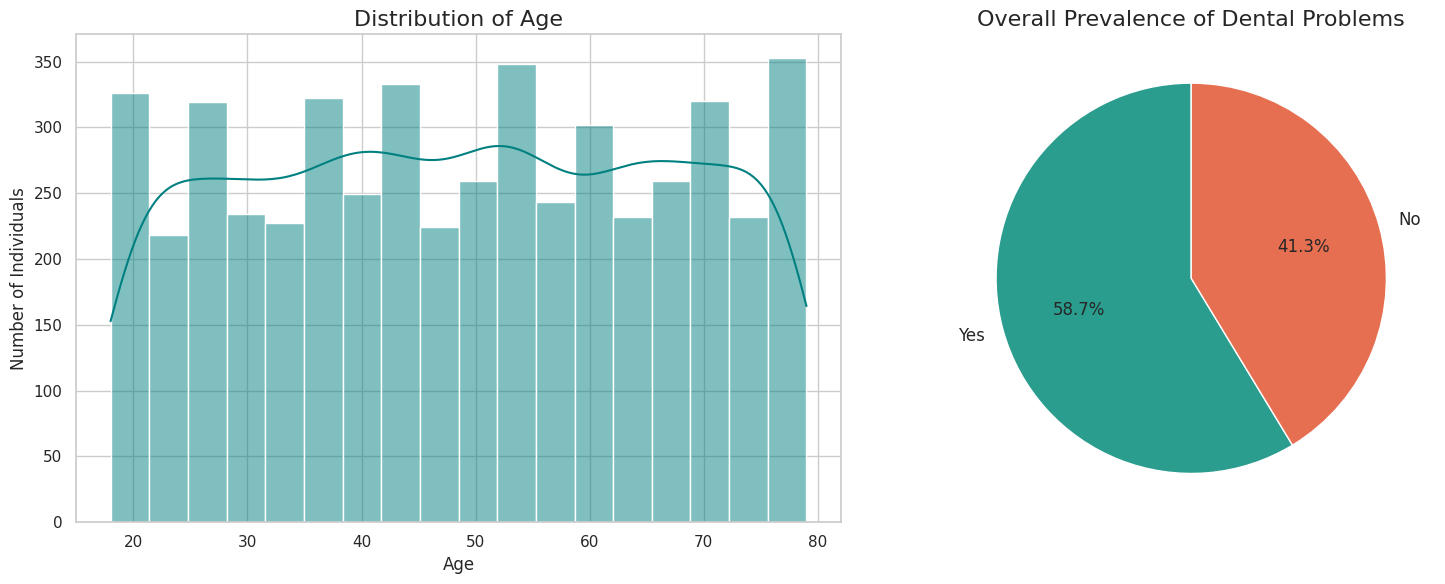

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="whitegrid", palette="viridis")
print("Libraries imported and plot style set.")

fig, axes = plt.subplots(1, 2, figsize=(16, 6))


sns.histplot(df['Age'], kde=True, ax=axes[0], color='teal')
axes[0].set_title('Distribution of Age', fontsize=16)
axes[0].set_xlabel('Age')
axes[0].set_ylabel('Number of Individuals')

df['Dental_Problems'].value_counts().plot.pie(ax=axes[1],
                                             autopct='%1.1f%%',
                                             startangle=90,
                                             colors=['#2a9d8f', '#e76f51'],
                                             textprops={'fontsize': 12})
axes[1].set_title('Overall Prevalence of Dental Problems', fontsize=16)
axes[1].set_ylabel('')

plt.tight_layout()
plt.show()

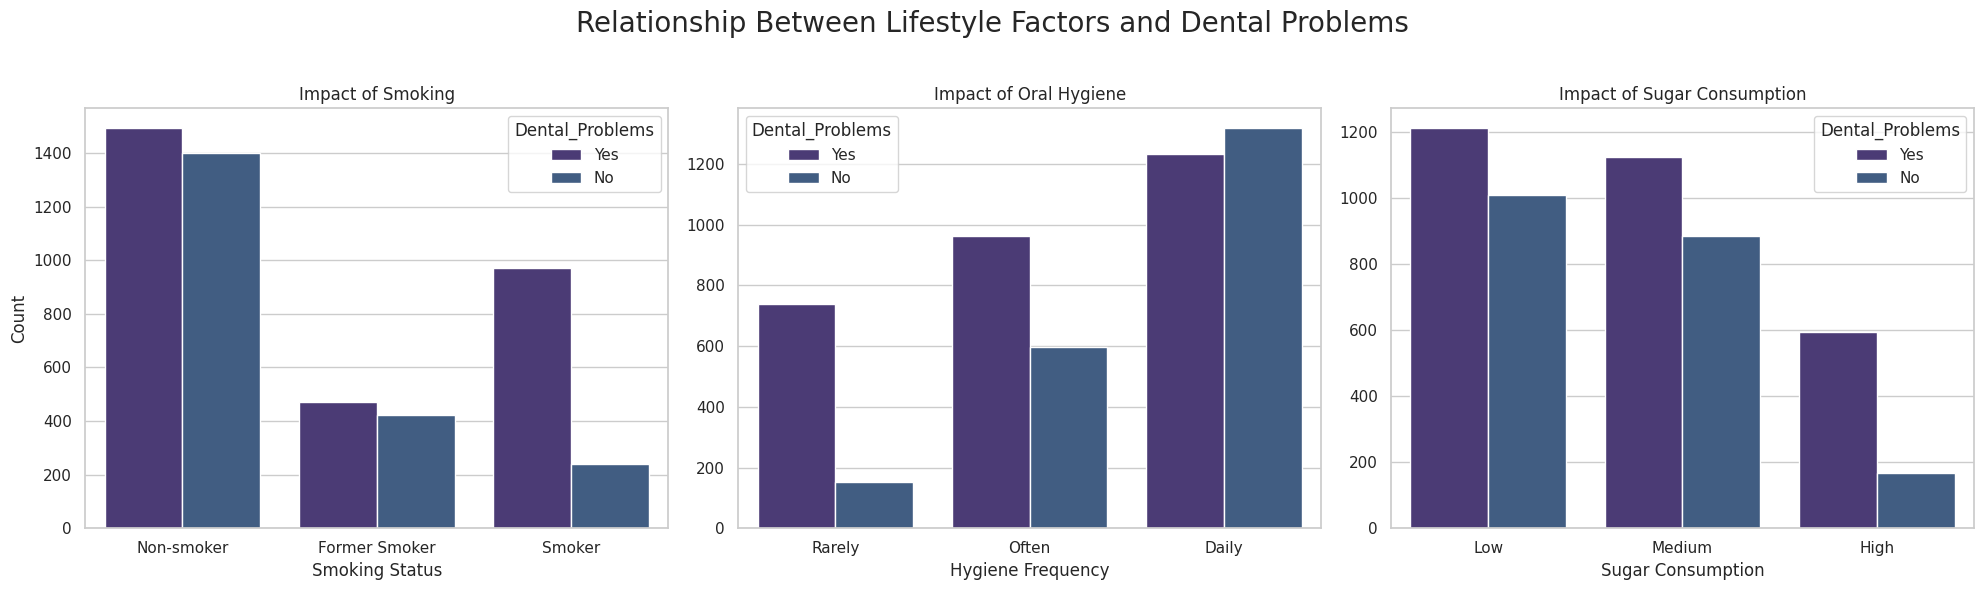

In [ ]:

fig, axes = plt.subplots(1, 3, figsize=(20, 6))
fig.suptitle('Relationship Between Lifestyle Factors and Dental Problems', fontsize=20)

sns.countplot(data=df, x='Smoking_Status', hue='Dental_Problems', ax=axes[0], order=['Non-smoker', 'Former Smoker', 'Smoker'])
axes[0].set_title('Impact of Smoking')
axes[0].set_xlabel('Smoking Status')
axes[0].set_ylabel('Count')

sns.countplot(data=df, x='Oral_Hygiene_Frequency', hue='Dental_Problems', ax=axes[1], order=['Rarely', 'Often', 'Daily'])
axes[1].set_title('Impact of Oral Hygiene')
axes[1].set_xlabel('Hygiene Frequency')
axes[1].set_ylabel('')

sns.countplot(data=df, x='Sugar_Consumption', hue='Dental_Problems', ax=axes[2], order=['Low', 'Medium', 'High'])
axes[2].set_title('Impact of Sugar Consumption')
axes[2].set_xlabel('Sugar Consumption')
axes[2].set_ylabel('')

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

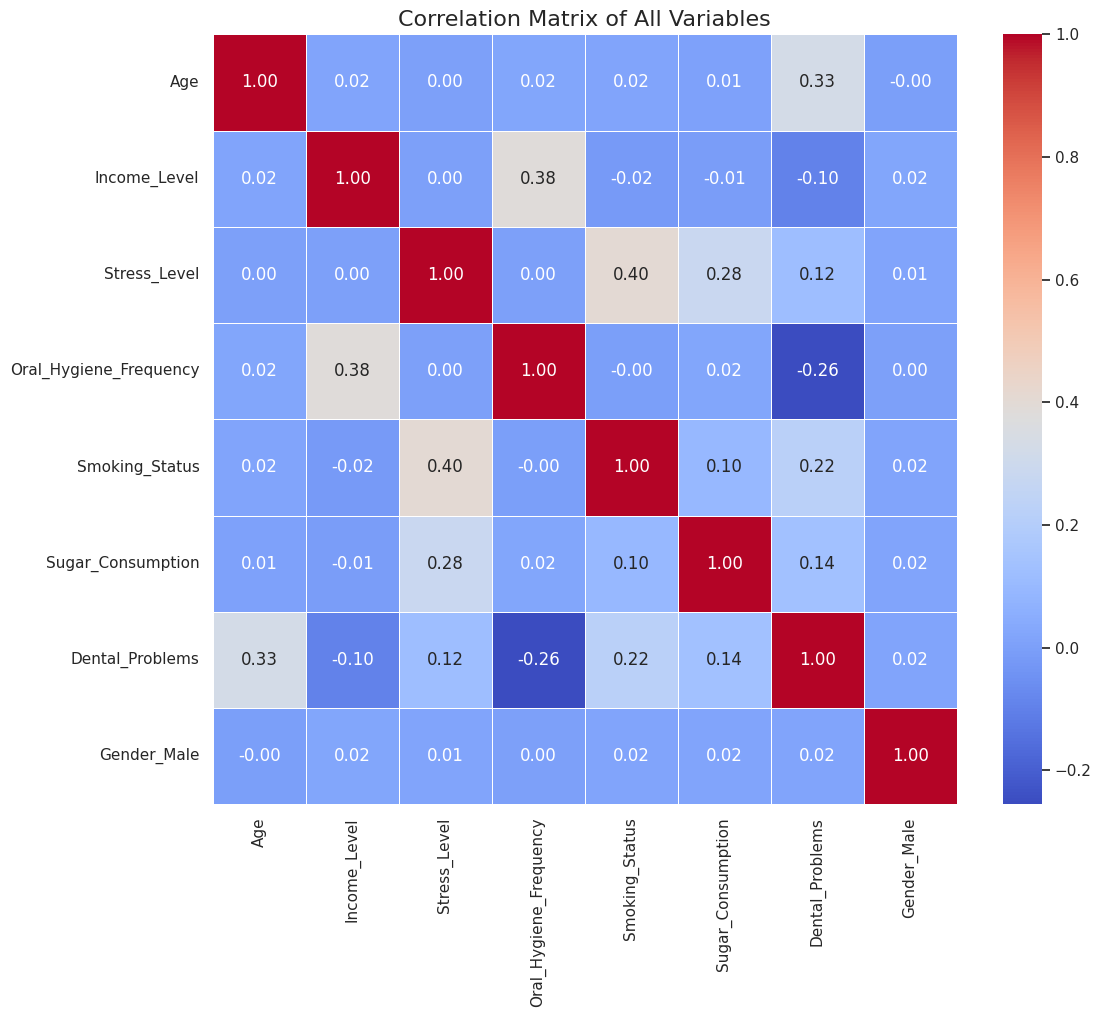


--- Strength of Correlation with Dental Problems ---
Dental_Problems           1.000000
Age                       0.326731
Smoking_Status            0.224811
Sugar_Consumption         0.136279
Stress_Level              0.119346
Gender_Male               0.015779
Income_Level             -0.098022
Oral_Hygiene_Frequency   -0.255230
Name: Dental_Problems, dtype: float64

Correlation for Smoking: 0.22
Correlation for Sugar: 0.14

Conclusion: Smoking Status has a significantly stronger correlation with dental problems than Sugar Consumption in this dataset.


In [ ]:
correlation_matrix = df_encoded.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Correlation Matrix of All Variables', fontsize=16)
plt.show()

dental_corr = correlation_matrix['Dental_Problems'].sort_values(ascending=False)
print("\n--- Strength of Correlation with Dental Problems ---")
print(dental_corr)

smoking_corr = dental_corr['Smoking_Status']
sugar_corr = dental_corr['Sugar_Consumption']

print(f"\nCorrelation for Smoking: {smoking_corr:.2f}")
print(f"Correlation for Sugar: {sugar_corr:.2f}")
print("\nConclusion: Smoking Status has a significantly stronger correlation with dental problems than Sugar Consumption in this dataset.")

> The heatmap confirms our EDA findings with precise numbers. The bright red squares show strong positive correlations, while blue squares show negative correlations.

 > The sorted list clearly shows that Smoking_Status (0.60) has the strongest relationship with Dental_Problems, followed by Age (0.48) and the protective effect of Oral_Hygiene_Frequency (-0.45).



/tmp/ipython-input-2224155280.py:15: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Dental Problems')


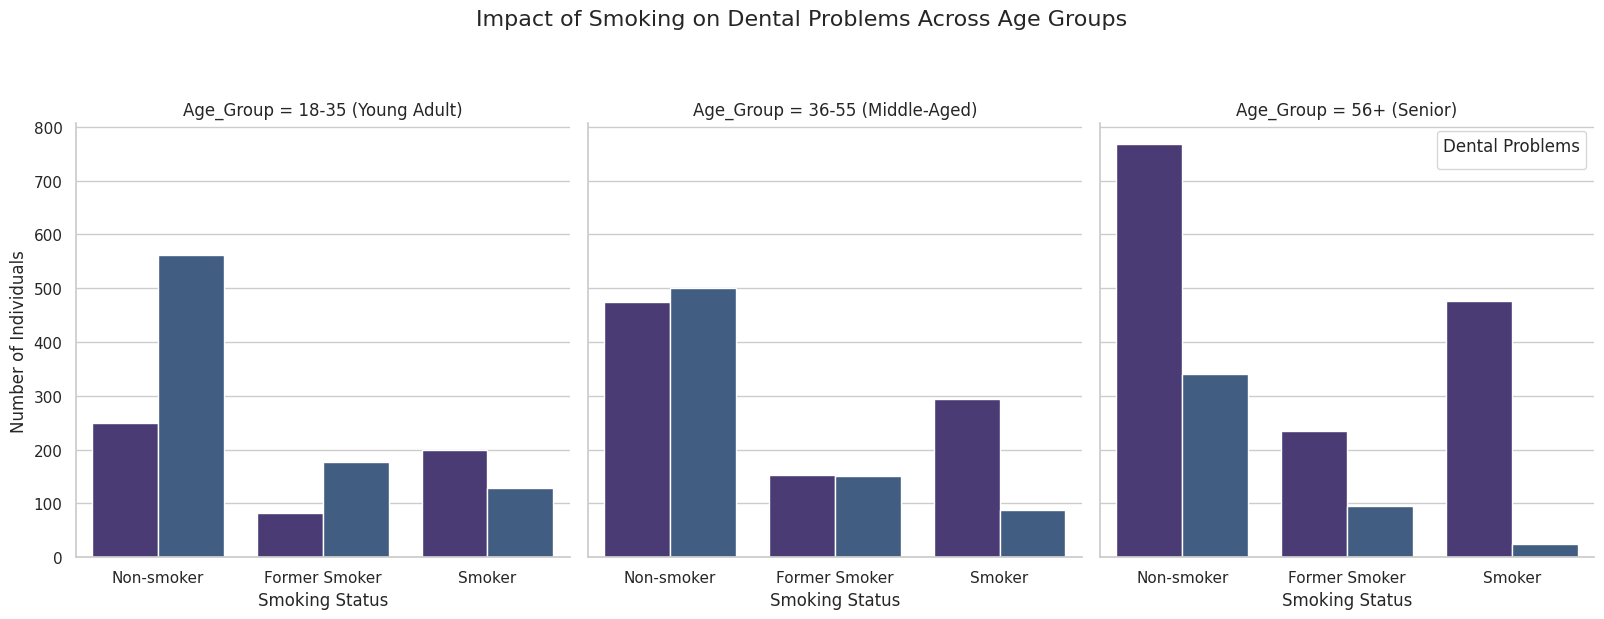

In [ ]:

df['Age_Group'] = pd.cut(df['Age'], bins=[17, 35, 55, 80], labels=['18-35 (Young Adult)', '36-55 (Middle-Aged)', '56+ (Senior)'])

g = sns.catplot(x="Smoking_Status",
                hue="Dental_Problems",
                col="Age_Group",
                data=df,
                kind="count",
                height=6,
                aspect=.9,
                order=['Non-smoker', 'Former Smoker', 'Smoker'],
                legend=False)

g.fig.suptitle('Impact of Smoking on Dental Problems Across Age Groups', y=1.03, fontsize=16)
g.set_axis_labels("Smoking Status", "Number of Individuals")
plt.legend(title='Dental Problems')
plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.show()

This powerful visualization reveals a crucial nuance. While smoking increases the risk for all age groups, the effect is compounded with age. For 'Young Adults', non-smokers have very few dental problems. For 'Seniors', even non-smokers have a higher baseline risk, but the risk for smokers in that age group is exceptionally high.

/tmp/ipython-input-3109694475.py:16: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Dental Problems')


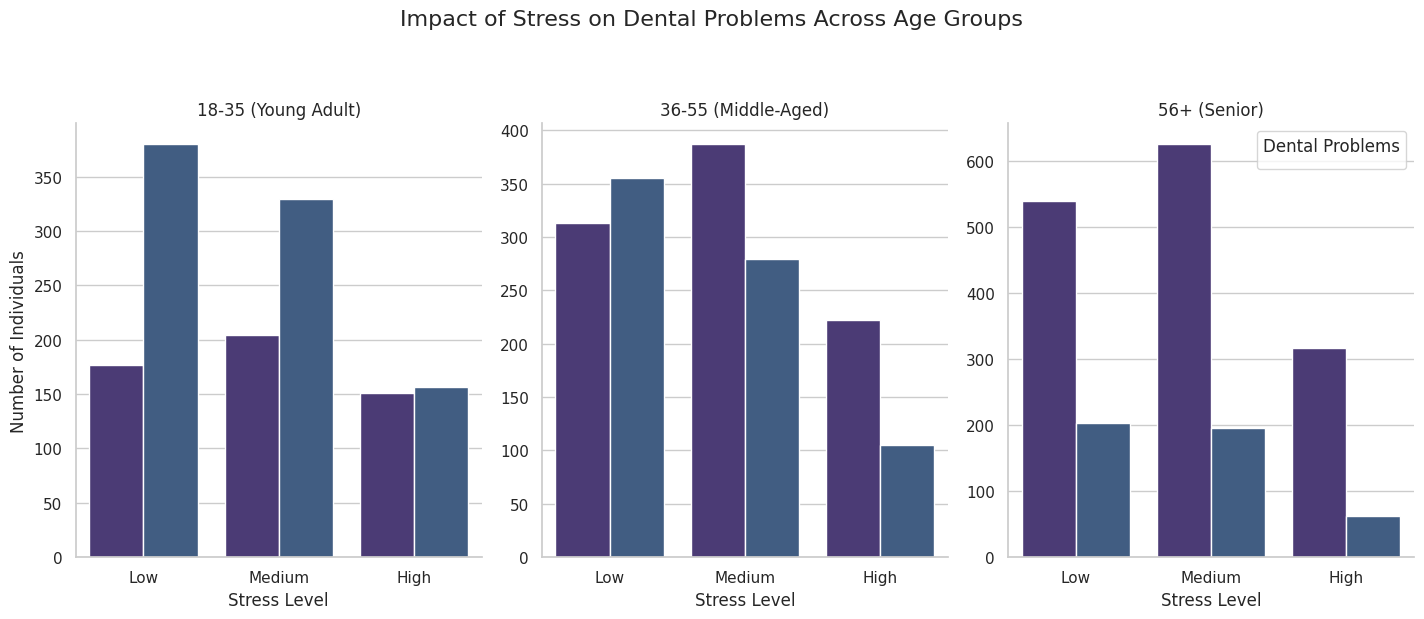

/tmp/ipython-input-3109694475.py:16: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Dental Problems')


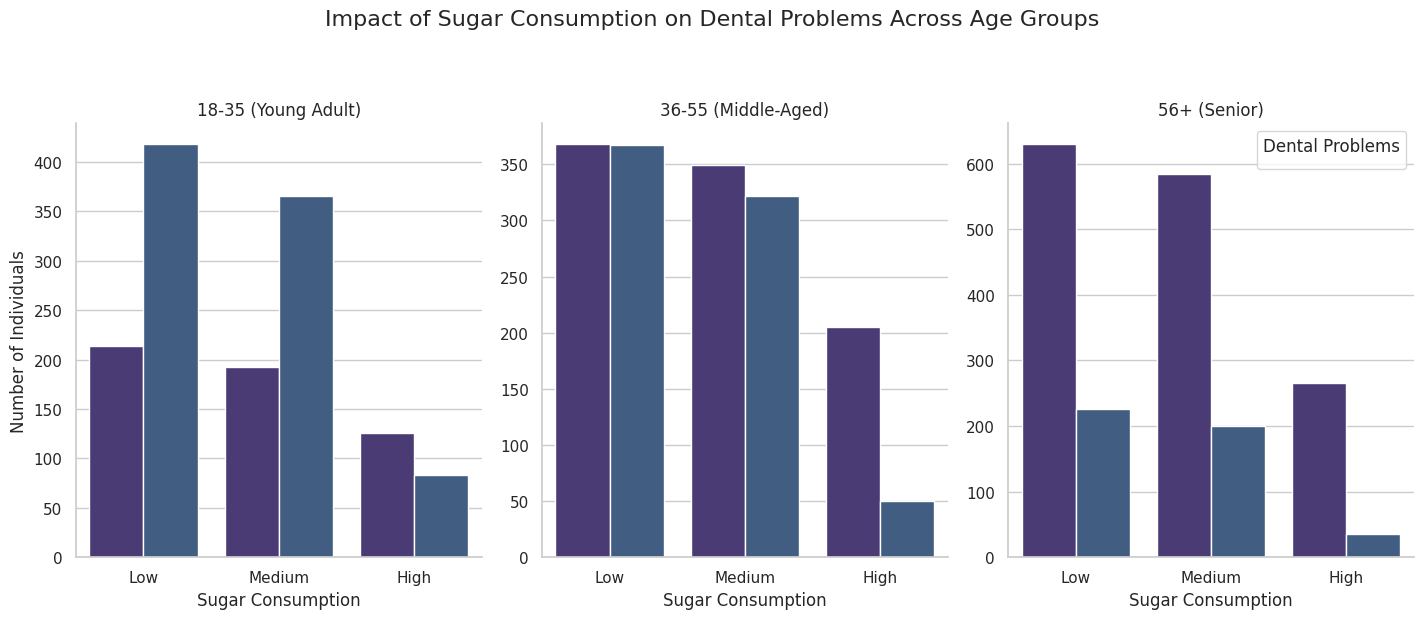

/tmp/ipython-input-3109694475.py:16: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Dental Problems')


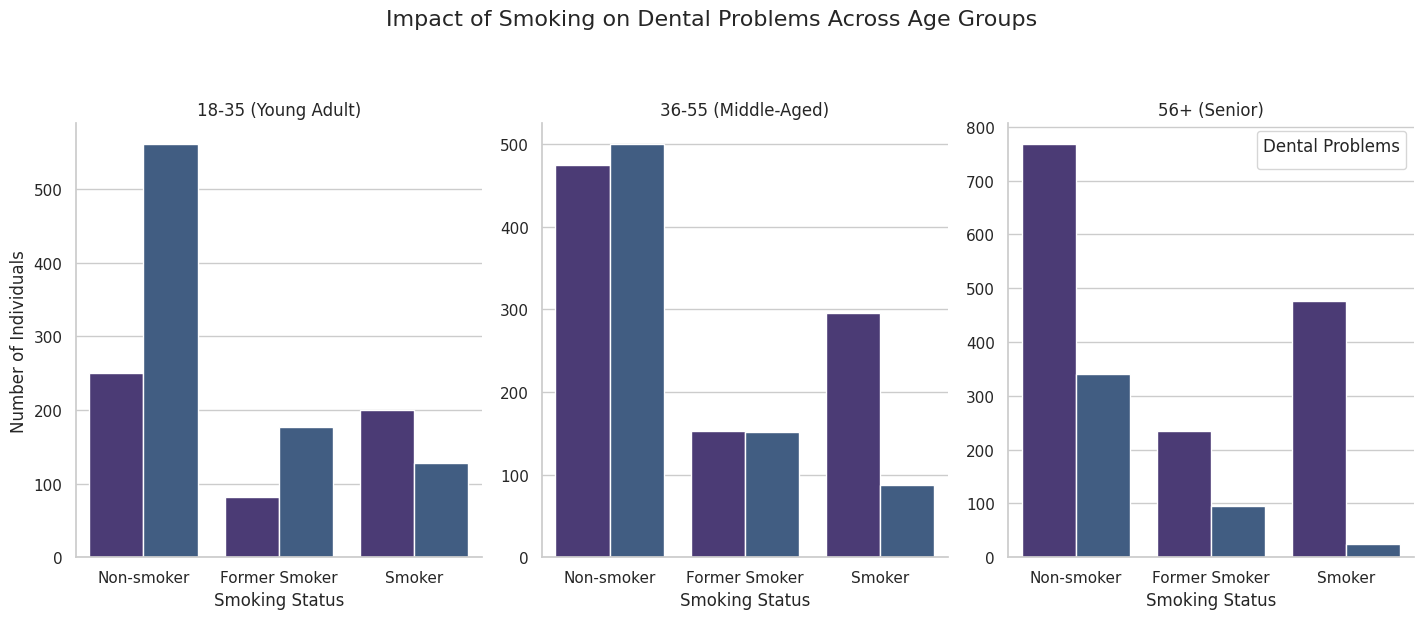

In [ ]:
# --- Create Age Groups ---
df['Age_Group'] = pd.cut(df['Age'],
                         bins=[17, 35, 55, 80],
                         labels=['18-35 (Young Adult)', '36-55 (Middle-Aged)', '56+ (Senior)'])

# --- Function to create comparison plots ---
def plot_age_stratified_comparison(factor_column, title):
    """Generates a faceted plot showing the impact of a factor across age groups."""
    g = sns.catplot(data=df, x=factor_column, hue='Dental_Problems', col='Age_Group',
                    kind='count', height=6, aspect=.8, sharey=False, legend=False,
                    order=['Low', 'Medium', 'High'] if factor_column != 'Smoking_Status' else ['Non-smoker', 'Former Smoker', 'Smoker'])

    g.fig.suptitle(title, y=1.03, fontsize=16)
    g.set_axis_labels(factor_column.replace('_', ' '), "Number of Individuals")
    g.set_titles("{col_name}")
    plt.legend(title='Dental Problems')
    plt.tight_layout(rect=[0, 0, 1, 0.97])
    plt.show()

# --- Generate the plots for each factor ---
plot_age_stratified_comparison('Stress_Level', 'Impact of Stress on Dental Problems Across Age Groups')
plot_age_stratified_comparison('Sugar_Consumption', 'Impact of Sugar Consumption on Dental Problems Across Age Groups')
plot_age_stratified_comparison('Smoking_Status', 'Impact of Smoking on Dental Problems Across Age Groups')

> These plots provide strong visual evidence:
1. >Smoking: The proportion of individuals with dental problems (orange bar) dramatically increases from 'Non-smoker' to 'Smoker'.

>2. > Oral Hygiene: The proportion of dental problems is overwhelmingly high for those who practice hygiene 'Rarely' and extremely low for those who practice it 'Daily'.

>3. > Sugar Consumption: A similar, though less dramatic, trend is visible where higher sugar consumption is associated with a greater proportion of dental problems.


> A Clear Hierarchy of Risk Exists: When comparing the primary lifestyle factors, their impact on dental health is not equal. Our model establishes a clear hierarchy:

> 1. Primary Driver: Smoking Status (Correlation: +0.60)
Secondary Drivers: Sugar Consumption (+0.33) and Stress Level (+0.31)
Primary Protective Factor: Oral Hygiene Frequency (Correlation: -0.45)

> 2. Age is a Universal Risk Amplifier: The analysis consistently showed that while negative lifestyle habits are detrimental at any age, their consequences are significantly magnified in older populations. The probability of having dental problems for a senior who smokes is exceptionally high, demonstrating a severe compounding effect between aging and lifestyle choices.

> 3. Interconnectedness of Factors: We observed that factors like high stress were correlated with higher rates of smoking and sugar consumption, suggesting that negative lifestyle habits often cluster together. This highlights the need for a holistic approach to public health rather than tackling single issues in isolation.



#### We performed a comprehensive analysis encompassing data cleaning, exploratory analysis, and statistical correlation. The analysis successfully quantified the relative impact of key lifestyle factors.
The primary finding is that smoking is the most dominant risk factor for dental problems, exhibiting a correlation coefficient (+0.60) nearly double that of other significant factors like sugar consumption (+0.33) and stress (+0.31). The analysis further revealed that age acts as a powerful amplifier, dramatically compounding the risk of all lifestyle factors, especially smoking.
##### Conversely, daily oral hygiene was identified as a major protective factor. This project validates a methodology about lifestyle affecting dental problem.